# Predicting the news label using models : SimpleRNN, LSTM, GRU, BiSimpleRnn, BiLSTM, BiGRU from the newswires.
# Comparing the results of all the models.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Bidirectional, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [3]:
# Number of most frequent words to keep in the vocabulary
MAX_WORDS = 10000
# Maximum length of the sequences. Reviews longer than this will be truncated.
MAX_LENGTH = 200
# The size of the vector space in which words will be embedded.
EMBEDDING_DIM = 128
# The batch size for training
BATCH_SIZE = 32
# Number of epochs to train for
EPOCHS = 10

In [4]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=MAX_WORDS)

print(f"Original training sequences: {len(X_train)}")
print(f"Original test sequences: {len(X_test)}")

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Original training sequences: 8982
Original test sequences: 2246


In [6]:

# Loading the word index dictionary mapping words to integers
word_index = reuters.get_word_index()

# Creating a reverse dictionary mapping integers to words
reverse_word_index = {value + 3: key for key, value in word_index.items()}

reverse_word_index[0] = '<PAD>'
reverse_word_index[1] = '<START>'
reverse_word_index[2] = '<UNK>'

def decode_(text_indices):
    # Convert list of integers back to words
    return ' '.join([reverse_word_index.get(i, '?') for i in text_indices])

labels = np.array(reuters.get_label_names()) # Printing the labels
print(labels)
print("\n")

# Example: Print the first 5 rows with their labels
for i in range(5):
    print(f"Newswire {i+1} (label: {labels[i]}):")
    print(decode_(X_test[i]))
    print("\n" + "-"*80 + "\n")

['cocoa' 'grain' 'veg-oil' 'earn' 'acq' 'wheat' 'copper' 'housing'
 'money-supply' 'coffee' 'sugar' 'trade' 'reserves' 'ship' 'cotton'
 'carcass' 'crude' 'nat-gas' 'cpi' 'money-fx' 'interest' 'gnp' 'meal-feed'
 'alum' 'oilseed' 'gold' 'tin' 'strategic-metal' 'livestock' 'retail'
 'ipi' 'iron-steel' 'rubber' 'heat' 'jobs' 'lei' 'bop' 'zinc' 'orange'
 'pet-chem' 'dlr' 'gas' 'silver' 'wpi' 'hog' 'lead']


Newswire 1 (label: cocoa):
<START> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <UNK> growth and expansion plans for <UNK> inc and <UNK> inc over the next two years a and p said the acquisition of <UNK> in august 1986 and <UNK> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details 

In [39]:
# Pad sequences to a fixed length (MAX_REVIEW_LENGTH)
# 'padding="post"' means sequences shorter than MAX_REVIEW_LENGTH are padded at the end.
print(f"Padding sequences to max length: {MAX_LENGTH}...")
X_train = pad_sequences(X_train, maxlen=MAX_LENGTH, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=MAX_LENGTH, padding='post', truncating='post')

print(f"X_train shape after padding: {X_train.shape}")
print(f"X_test shape after padding: {X_test.shape}")


Padding sequences to max length: 200...
X_train shape after padding: (8982, 200)
X_test shape after padding: (2246, 200)


In [40]:
# Example: Print the first 3 newswire with their labels
for i in range(3):
    print(f"Newswire {i+1} (label: {y_test[i]}):")
    print(X_train[i])
    print(decode_(X_test[i]))
    print("\n" + "-"*80 + "\n")

Newswire 1 (label: 3):
[   1    2    2    8   43   10  447    5   25  207  270    5 3095  111
   16  369  186   90   67    7   89    5   19  102    6   19  124   15
   90   67   84   22  482   26    7   48    4   49    8  864   39  209
  154    6  151    6   83   11   15   22  155   11   15    7   48    9
 4579 1005  504    6  258    6  272   11   15   22  134   44   11   15
   16    8  197 1245   90   67   52   29  209   30   32  132    6  109
   15   17   12    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    

Preparing and training six RNNs - SimpleRNN, LSTM, GRU, BiSimpleRNN, BiLSTM and BiGRU comprising two hidden layers with 64 units each, for 10 epochs and reporting the classification accuracy on the test dataset for all the six models.

In [41]:
from tensorflow import keras
from tensorflow.keras import layers

# Simple RNN

In [42]:
input_ = keras.layers.Input(shape=X_train.shape[1:], dtype = "int32")
x = keras.layers.Embedding(MAX_WORDS, EMBEDDING_DIM)(input_)
x = keras.layers.SimpleRNN(units = 64, use_bias=True, return_sequences= True)(x)
x = keras.layers.SimpleRNN(units=64, use_bias=True, return_sequences=False)(x)
output_ = keras.layers.Dense(units = 46, activation="softmax")(x)

model_SimpleRNN = keras.models.Model(inputs=[input_], outputs=[output_])

In [43]:
model_SimpleRNN.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_8 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_14 (SimpleRNN)       │ (None, 200, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_15 (SimpleRNN)       │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,303,598 (4.97 MB)

 Trainable params: 1,303,598 (4.97 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model_SimpleRNN.compile(loss="sparse_categorical_crossentropy",
                   optimizer="adam",
                   metrics=["accuracy"])

In [47]:
history_SimpleRNN = model_SimpleRNN.fit(x=X_train, y=y_train,
                                        epochs=EPOCHS, validation_split=0.1, batch_size=BATCH_SIZE)

Epoch 1/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.3265 - loss: 2.6055 - val_accuracy: 0.3393 - val_loss: 2.4327
Epoch 2/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.3841 - loss: 2.3097 - val_accuracy: 0.3604 - val_loss: 2.3629
Epoch 3/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.4712 - loss: 2.0250 - val_accuracy: 0.3482 - val_loss: 2.4773
Epoch 4/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.5246 - loss: 1.8370 - val_accuracy: 0.3448 - val_loss: 2.5485
Epoch 5/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.5452 - loss: 1.7534 - val_accuracy: 0.3382 - val_loss: 2.5961
Epoch 6/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.5409 - loss: 1.7514 - val_accuracy: 0.3526 - val_loss: 2.5771
Epoch 7/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.5532 - loss: 1.7238 - val_accuracy: 0.3526 - val_loss: 2.6575
Epoch 8/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.5636 - loss: 1.6530 - val_acc

In [59]:
test_loss_SimpleRNN, test_accuracy_SimpleRNN = model_SimpleRNN.evaluate(x=X_test, y=y_test)

print(test_loss_SimpleRNN, test_accuracy_SimpleRNN)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3653 - loss: 2.7887
2.7909300327301025 0.3584149479866028


# LSTM

In [55]:
input_LSTM = keras.Input(shape=X_train.shape[1:], dtype="int32")
x = layers.Embedding(MAX_WORDS, EMBEDDING_DIM)(input_LSTM)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
output_LSTM = layers.Dense(46, activation="softmax")(x)

model_LSTM = keras.Model(input_LSTM, output_LSTM)

In [56]:
model_LSTM.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_11 (Embedding)        │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 200, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,365,422 (5.21 MB)

 Trainable params: 1,365,422 (5.21 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model_LSTM.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [58]:
history_LSTM = model_LSTM.fit(X_train, y_train,
                        batch_size = BATCH_SIZE,
                        epochs = EPOCHS,
                        validation_split = 0.1)

Epoch 1/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.3475 - loss: 2.6286 - val_accuracy: 0.3526 - val_loss: 2.4304
Epoch 2/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.3523 - loss: 2.3946 - val_accuracy: 0.3459 - val_loss: 2.4071
Epoch 3/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.3607 - loss: 2.3437 - val_accuracy: 0.4516 - val_loss: 2.2212
Epoch 4/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.4659 - loss: 2.0960 - val_accuracy: 0.4839 - val_loss: 1.9479
Epoch 5/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.4802 - loss: 2.0183 - val_accuracy: 0.5195 - val_loss: 1.9263
Epoch 6/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5303 - loss: 1.8544 - val_accuracy: 0.5050 - val_loss: 2.0079
Epoch 7/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5323 - loss: 1.8403 - val_accuracy: 0.5617 - val_loss: 1.7882
Epoch 8/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5905 - loss: 1.6343 - val_accu

In [60]:
test_loss_LSTM, test_accuracy_LSTM = model_LSTM.evaluate(x=X_test,y=y_test)

print(test_loss_LSTM, test_accuracy_LSTM)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5718 - loss: 1.6939
1.7243974208831787 0.5592163801193237


# GRU

In [63]:
input_GRU = keras.layers.Input(shape = X_train.shape[1:])
x = keras.layers.Embedding(input_dim=MAX_WORDS,output_dim=EMBEDDING_DIM)(input_GRU)
x = keras.layers.GRU(units=64, return_sequences=True)(x)
x = keras.layers.GRU(units=64)(x)

output_GRU = keras.layers.Dense(units=46, activation='softmax')(x)

model_GRU = keras.models.Model(inputs=[input_GRU], outputs=[output_GRU])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [64]:
model_GRU.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_12 (Embedding)        │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 200, 64)        │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,345,198 (5.13 MB)

 Trainable params: 1,345,198 (5.13 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model_GRU.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [67]:
history_GRU = model_GRU.fit(X_train, y_train,
                        batch_size = BATCH_SIZE,
                        epochs = EPOCHS,
                        validation_split = 0.1)

Epoch 1/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.3668 - loss: 2.5809 - val_accuracy: 0.5617 - val_loss: 1.7924
Epoch 2/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5789 - loss: 1.7068 - val_accuracy: 0.5873 - val_loss: 1.6750
Epoch 3/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5969 - loss: 1.5657 - val_accuracy: 0.5996 - val_loss: 1.6161
Epoch 4/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6442 - loss: 1.4025 - val_accuracy: 0.6151 - val_loss: 1.5727
Epoch 5/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6836 - loss: 1.2503 - val_accuracy: 0.6274 - val_loss: 1.5486
Epoch 6/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.7252 - loss: 1.1039 - val_accuracy: 0.6418 - val_loss: 1.4917
Epoch 7/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7442 - loss: 1.0180 - val_accuracy: 0.6618 - val_loss: 1.4755
Epoch 8/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7730 - loss: 0.8861 - val_accu

In [68]:
test_loss_GRU, test_accuracy_GRU = model_GRU.evaluate(x=X_test, y=y_test)

print(test_loss_GRU, test_accuracy_GRU)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6788 - loss: 1.4361
1.453606367111206 0.6736420392990112


# BiSimpleRNN

In [69]:
input_BiRNN = keras.Input(shape=X_train.shape[1:], dtype="int32")
x = layers.Embedding(MAX_WORDS, EMBEDDING_DIM)(input_BiRNN)
x = layers.Bidirectional(layers.SimpleRNN(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.SimpleRNN(64))(x)
output_BiRNN = layers.Dense(46, activation="softmax")(x)

model_BiRNN = keras.Model(input_BiRNN, output_BiRNN)

In [70]:
model_BiRNN.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_13 (Embedding)        │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 200, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,335,342 (5.09 MB)

 Trainable params: 1,335,342 (5.09 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
model_BiRNN.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [72]:
history_BiRNN = model_BiRNN.fit(X_train, y_train,
                        batch_size = BATCH_SIZE,
                        epochs = EPOCHS,
                        validation_split = 0.1)

Epoch 1/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 24s 73ms/step - accuracy: 0.4568 - loss: 2.1754 - val_accuracy: 0.6162 - val_loss: 1.5684
Epoch 2/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.7002 - loss: 1.2268 - val_accuracy: 0.6641 - val_loss: 1.4153
Epoch 3/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.8332 - loss: 0.7267 - val_accuracy: 0.6707 - val_loss: 1.4671
Epoch 4/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - accuracy: 0.9216 - loss: 0.3755 - val_accuracy: 0.6707 - val_loss: 1.5367
Epoch 5/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.9517 - loss: 0.2385 - val_accuracy: 0.6496 - val_loss: 1.6764
Epoch 6/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.9578 - loss: 0.1642 - val_accuracy: 0.6485 - val_loss: 1.7264
Epoch 7/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.9613 - loss: 0.1348 - val_accuracy: 0.6641 - val_loss: 1.7298
Epoch 8/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.9598 - loss: 0.1148 - 

In [73]:
test_loss_BiRNN, test_accuracy_BiRNN = model_BiRNN.evaluate(x=X_test, y=y_test)

print(test_loss_BiRNN, test_accuracy_BiRNN)

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6736 - loss: 1.7954
1.7900720834732056 0.670970618724823


# BiLSTM

In [75]:
input_BiLSTM = keras.Input(shape=X_train.shape[1:], dtype="int32")
x = layers.Embedding(MAX_WORDS, EMBEDDING_DIM)(input_BiLSTM)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
output_BiLSTM = layers.Dense(46, activation="softmax")(x)

model_BiLSTM = keras.Model(input_BiLSTM, output_BiLSTM)

In [76]:
model_BiLSTM.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_15 (Embedding)        │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 200, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,483,566 (5.66 MB)

 Trainable params: 1,483,566 (5.66 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
model_BiLSTM.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [78]:
history_BiLSTM = model_BiLSTM.fit(X_train, y_train,
                        batch_size = BATCH_SIZE,
                        epochs = EPOCHS,
                        validation_split = 0.1)

Epoch 1/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.4794 - loss: 2.1604 - val_accuracy: 0.6085 - val_loss: 1.5970
Epoch 2/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.6544 - loss: 1.4020 - val_accuracy: 0.6696 - val_loss: 1.3255
Epoch 3/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.7547 - loss: 0.9945 - val_accuracy: 0.7208 - val_loss: 1.1737
Epoch 4/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.8084 - loss: 0.7642 - val_accuracy: 0.7108 - val_loss: 1.1457
Epoch 5/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.8501 - loss: 0.6065 - val_accuracy: 0.7430 - val_loss: 1.1217
Epoch 6/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.8797 - loss: 0.5102 - val_accuracy: 0.7375 - val_loss: 1.1376
Epoch 7/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9011 - loss: 0.4167 - val_accuracy: 0.7419 - val_loss: 1.1535
Epoch 8/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9101 - loss: 0.3806 - val_acc

In [79]:
test_loss_BiLSTM, test_accuracy_BiLSTM = model_BiLSTM.evaluate(x=X_test, y=y_test)

print(test_loss_BiLSTM, test_accuracy_BiLSTM)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7836 - loss: 1.1006
1.0999305248260498 0.780053436756134


# BiGRU

In [81]:
input_BiGRU = keras.Input(shape=X_train.shape[1:], dtype="int32")
x = layers.Embedding(MAX_WORDS, EMBEDDING_DIM)(input_BiGRU)
x = layers.Bidirectional(layers.GRU(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
output_BiGRU = layers.Dense(46, activation="softmax")(x)

model_BiGRU = keras.Model(input_BiGRU, output_BiGRU)

In [82]:
model_BiGRU.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_17 (Embedding)        │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (None, 200, 128)       │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ (None, 128)            │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,434,926 (5.47 MB)

 Trainable params: 1,434,926 (5.47 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
model_BiGRU.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [84]:
history_BiGRU = model_BiGRU.fit(X_train, y_train,
                        batch_size = BATCH_SIZE,
                        epochs = EPOCHS,
                        validation_split = 0.1)

Epoch 1/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.4501 - loss: 2.2862 - val_accuracy: 0.6062 - val_loss: 1.5861
Epoch 2/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.6493 - loss: 1.3952 - val_accuracy: 0.6707 - val_loss: 1.3925
Epoch 3/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.7338 - loss: 1.0983 - val_accuracy: 0.7041 - val_loss: 1.2469
Epoch 4/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.7954 - loss: 0.8583 - val_accuracy: 0.7130 - val_loss: 1.1942
Epoch 5/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.8264 - loss: 0.7171 - val_accuracy: 0.7219 - val_loss: 1.2060
Epoch 6/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8732 - loss: 0.5573 - val_accuracy: 0.7264 - val_loss: 1.1795
Epoch 7/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.8926 - loss: 0.4655 - val_accuracy: 0.7308 - val_loss: 1.1981
Epoch 8/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9070 - loss: 0.4117 - val_ac

In [85]:
test_loss_BiGRU, test_accuracy_BiGRU = model_BiGRU.evaluate(x=X_test, y=y_test)

print(test_loss_BiGRU, test_accuracy_BiGRU)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7352 - loss: 1.2100
1.2848938703536987 0.7292965054512024


# Generating classification report and display the precision, recall and F1-score results.

In [93]:
def print_classification_report(model, name):
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)

    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))

print_classification_report(model_SimpleRNN, "SimpleRNN")
print_classification_report(model_LSTM, "LSTM")
print_classification_report(model_GRU, "GRU")
print_classification_report(model_BiRNN, "BiSimpleRNN")
print_classification_report(model_BiLSTM, "BiLSTM")
print_classification_report(model_BiGRU, "BiGRU")


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step

Classification Report for SimpleRNN:
              precision    recall  f1-score   support

           0       0.33      0.08      0.13        12
           1       0.09      0.03      0.04       105
           2       0.00      0.00      0.00        20
           3       0.43      0.88      0.58       813
           4       0.20      0.07      0.10       474
           5       0.00      0.00      0.00         5
           6       0.33      0.07      0.12        14
           7       0.00      0.00      0.00         3
           8       0.14      0.08      0.10        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.17      0.18      0.18        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Classification Report for LSTM:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.10      0.19      0.13       105
           2       0.00      0.00      0.00        20
           3       0.87      0.93      0.90       813
           4       0.70      0.79      0.74       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.28      0.42      0.33        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
         

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Classification Report for GRU:
              precision    recall  f1-score   support

           0       0.40      0.17      0.24        12
           1       0.47      0.63      0.54       105
           2       0.14      0.15      0.14        20
           3       0.93      0.93      0.93       813
           4       0.86      0.82      0.84       474
           5       0.00      0.00      0.00         5
           6       0.20      0.21      0.21        14
           7       0.00      0.00      0.00         3
           8       0.44      0.21      0.29        38
           9       0.43      0.52      0.47        25
          10       0.22      0.47      0.30        30
          11       0.38      0.61      0.47        83
          12       0.00      0.00      0.00        13
          13       0.13      0.22      0.16        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step

Classification Report for BiSimpleRNN:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00       105
           2       0.00      0.00      0.00        20
           3       0.25      0.00      0.00       813
           4       0.00      0.00      0.00       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.05      0.08      0.06        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.11      0.01      0.02        83
          12       0.00      0.00      0.00        13
          13       0.08      0.03      0.04        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step

Classification Report for BiLSTM:
              precision    recall  f1-score   support

           0       0.08      0.08      0.08        12
           1       0.00      0.00      0.00       105
           2       0.00      0.00      0.00        20
           3       0.28      0.07      0.11       813
           4       0.08      0.00      0.00       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.03      0.50      0.06        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.00      0.00      0.00        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step

Classification Report for BiGRU:
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.50      0.61      0.55       105
           2       0.50      0.60      0.55        20
           3       0.90      0.93      0.91       813
           4       0.87      0.78      0.82       474
           5       0.00      0.00      0.00         5
           6       0.67      0.57      0.62        14
           7       1.00      0.33      0.50         3
           8       0.50      0.58      0.54        38
           9       0.77      0.92      0.84        25
          10       0.79      0.73      0.76        30
          11       0.55      0.65      0.60        83
          12       0.27      0.23      0.25        13
          13       0.30      0.30      0.30        37
          14       0.00      0.00      0.00         2
          15       0.25      0.11      0.15         9
       

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Generating Confusion Matrix and display the results.

Generating top-10 confusion matrix for SimpleRNN...


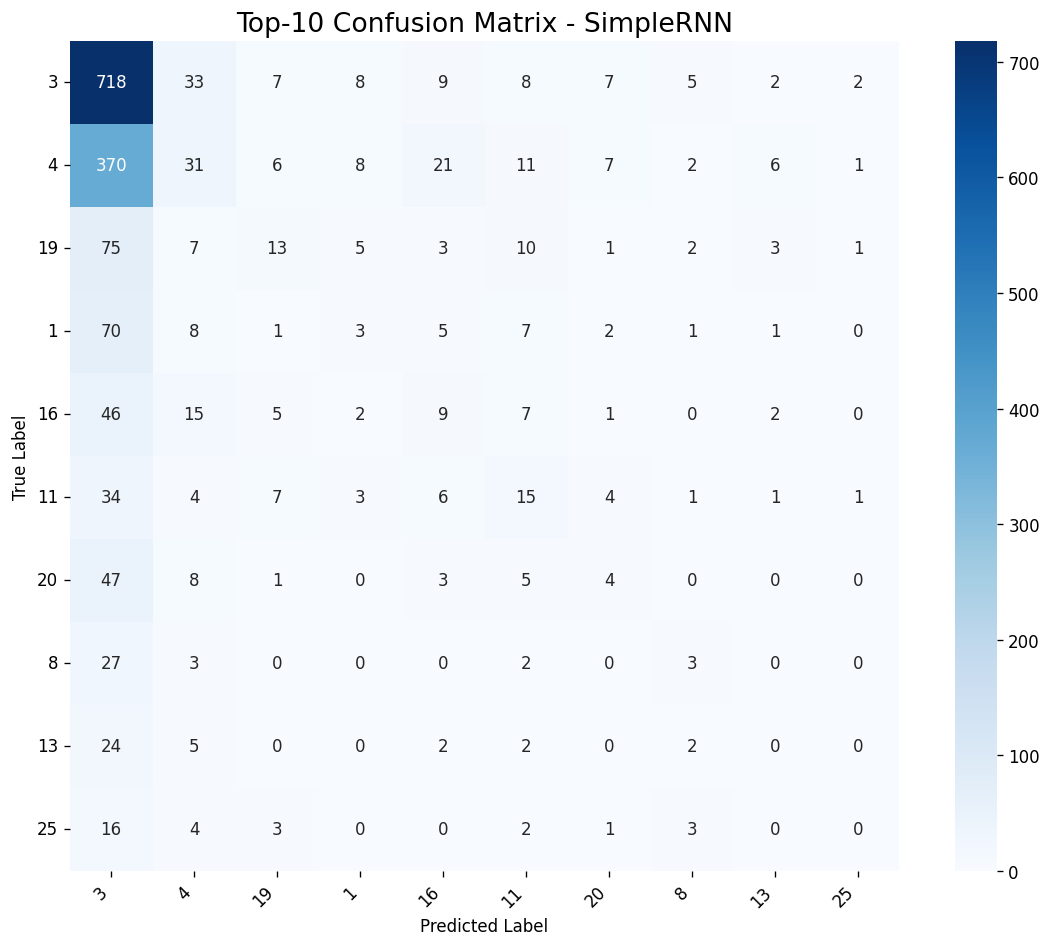

Done.
Generating top-10 confusion matrix for LSTM...


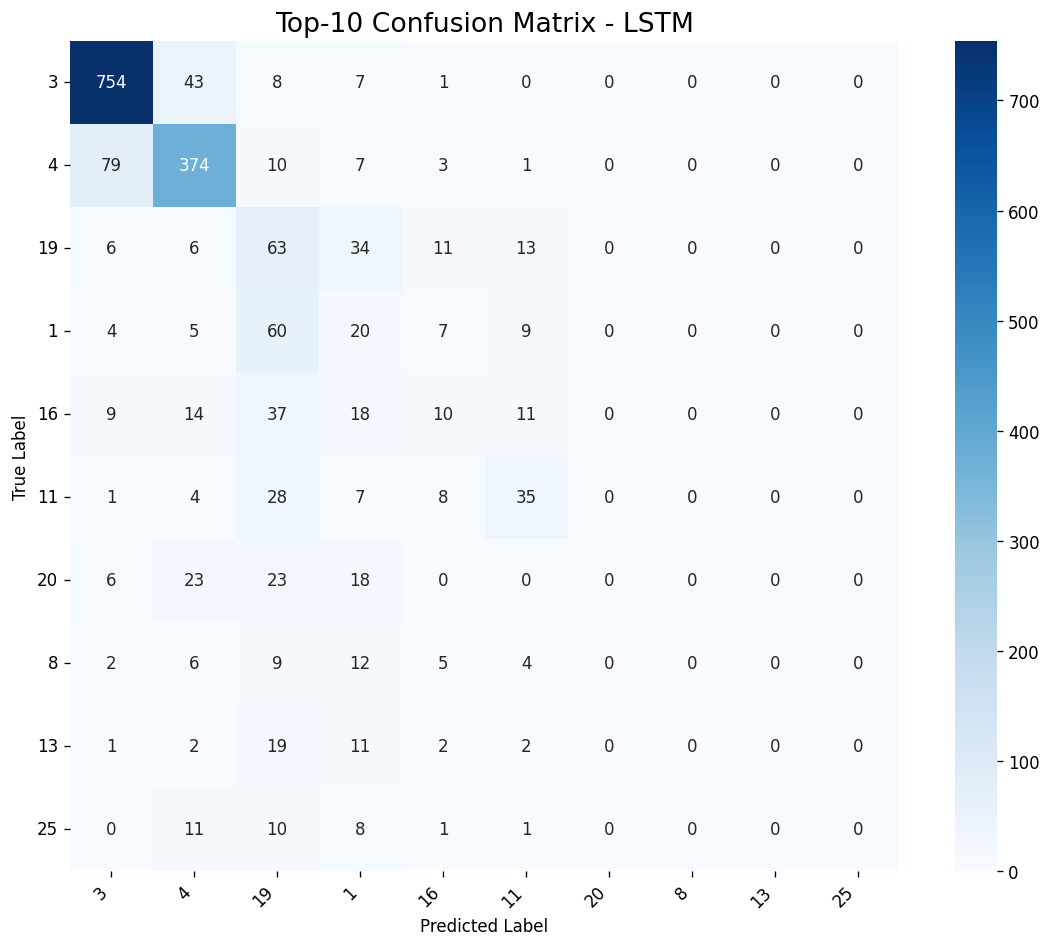

Done.
Generating top-10 confusion matrix for GRGRU...


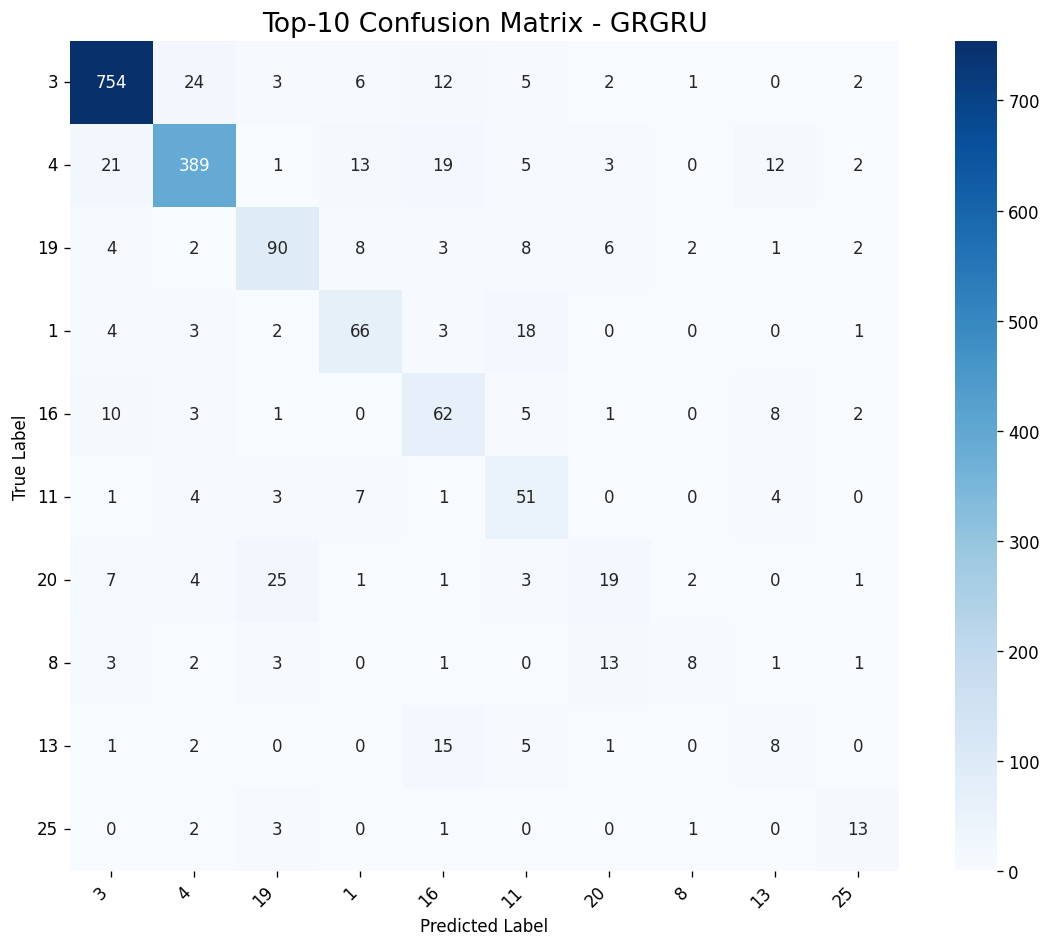

Done.
Generating top-10 confusion matrix for BiSimpleRNN...


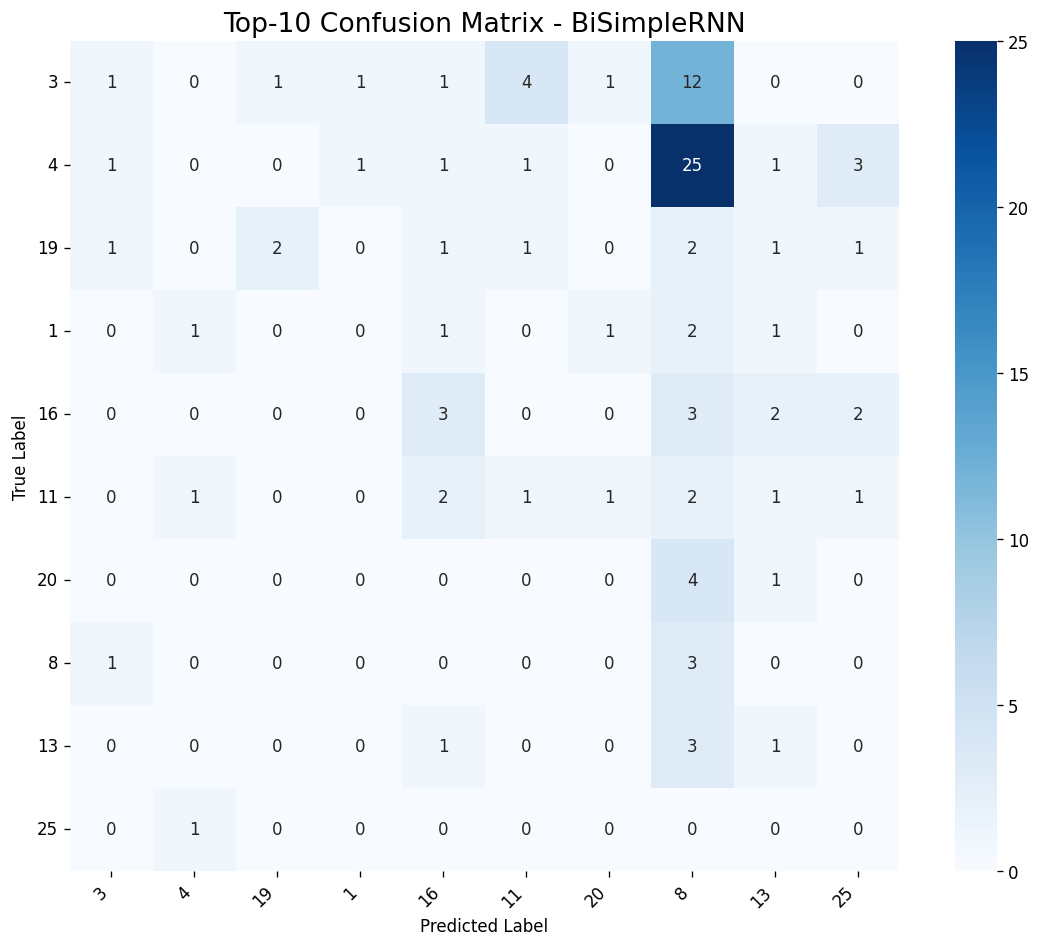

Done.
Generating top-10 confusion matrix for BiLSTM...


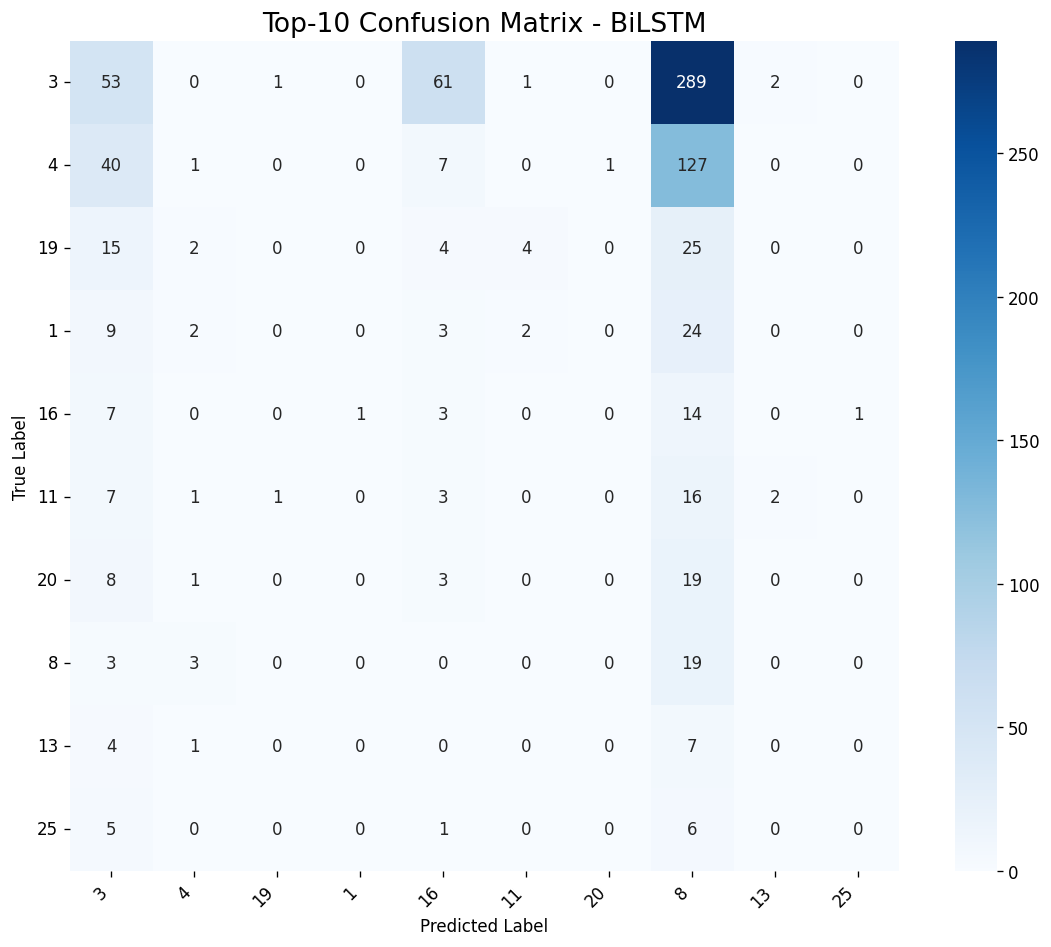

Done.
Generating top-10 confusion matrix for BiGRU...


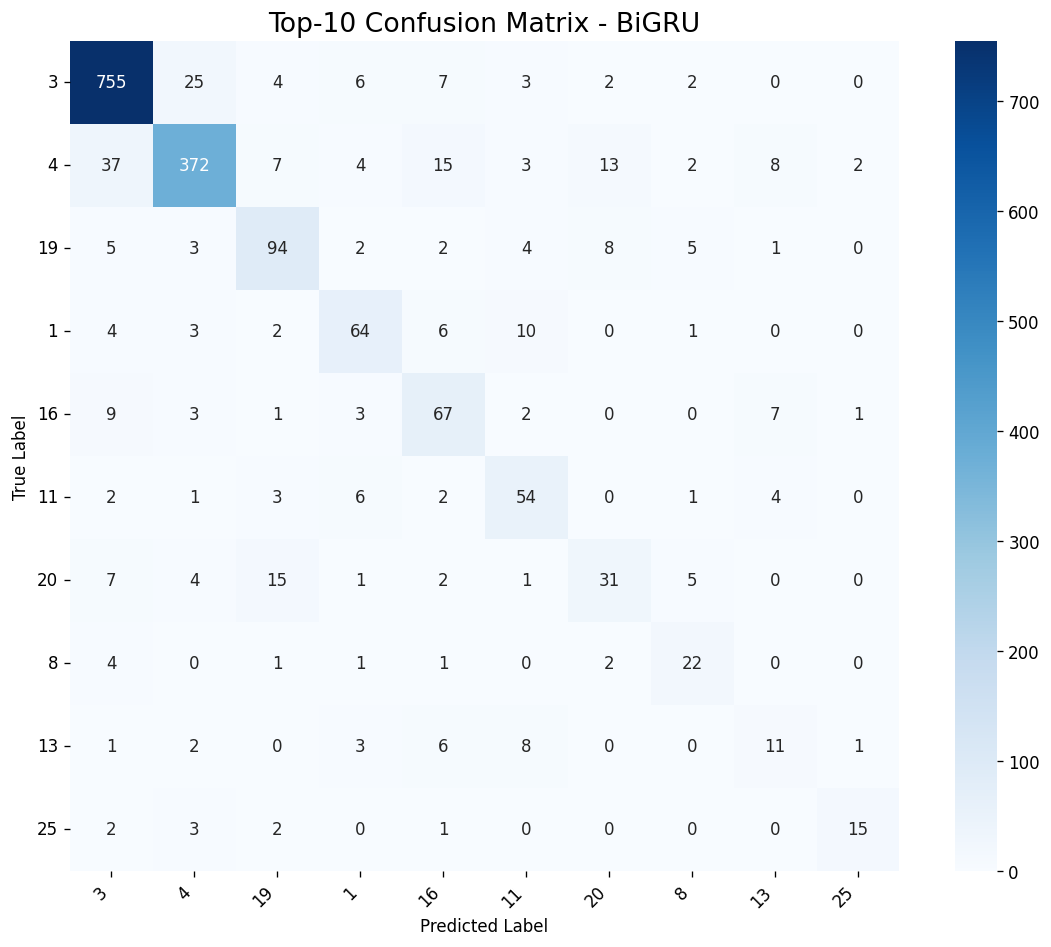

Done.


In [94]:
def plot_confusion_matrix(model, name, top_k=10, label_names=None):
    print(f"Generating top-{top_k} confusion matrix for {name}...")
    y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
    unique, counts = np.unique(y_test, return_counts=True)
    freq_order = unique[np.argsort(counts)[::-1]]   # descending
    top_classes = freq_order[:top_k]
    mask = np.isin(y_test, top_classes)
    y_true_top = y_test[mask]
    y_pred_top = y_pred[mask]

    cm = confusion_matrix(y_true_top, y_pred_top, labels=top_classes)
    cm = np.nan_to_num(cm)

    plt.figure(figsize=(10, 8), dpi=120)
    ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True, square=True)


    if label_names is None:
        labels = [str(c) for c in top_classes]
    else:
        labels = [label_names[c] for c in top_classes]

    ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=10)
    ax.set_yticklabels(labels, rotation=0, fontsize=10)

    plt.title(f"Top-{top_k} Confusion Matrix - {name}", fontsize=16)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()
    print("Done.")


# Call for all six models
plot_confusion_matrix(model_SimpleRNN, "SimpleRNN")
plot_confusion_matrix(model_LSTM, "LSTM")
plot_confusion_matrix(model_GRU, "GRGRU")
plot_confusion_matrix(model_BiRNN, "BiSimpleRNN")
plot_confusion_matrix(model_BiLSTM, "BiLSTM")
plot_confusion_matrix(model_BiGRU, "BiGRU")

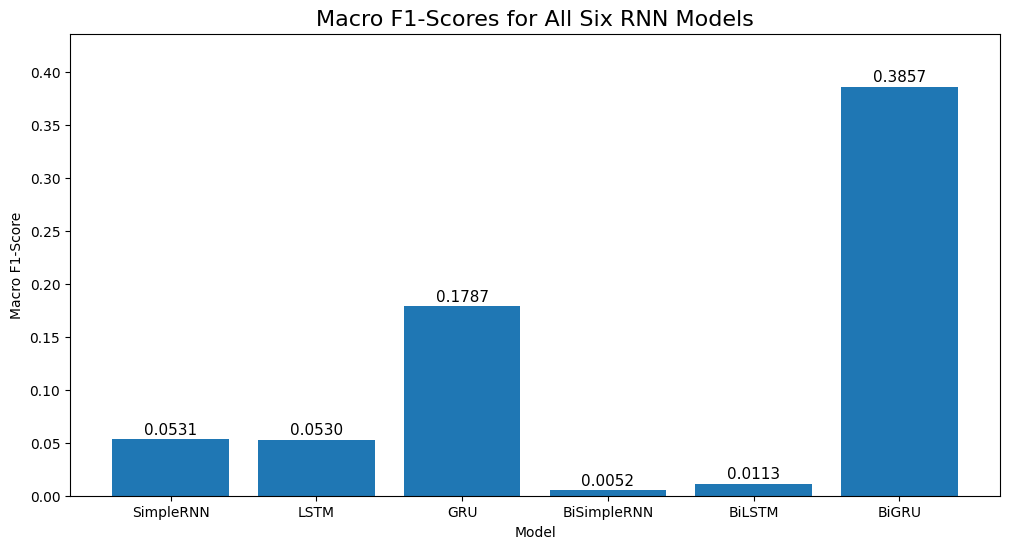

In [100]:
from sklearn.metrics import f1_score

models = [
    (model_SimpleRNN, "SimpleRNN"),
    (model_LSTM, "LSTM"),
    (model_GRU, "GRU"),
    (model_BiRNN, "BiSimpleRNN"),
    (model_BiLSTM, "BiLSTM"),
    (model_BiGRU, "BiGRU")
]

model_names = []
f1_scores = []

for model, name in models:
    y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
    f1 = f1_score(y_test, y_pred, average="macro")

    model_names.append(name)
    f1_scores.append(f1)


plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, f1_scores)

plt.title("Macro F1-Scores for All Six RNN Models", fontsize=16)
plt.xlabel("Model")
plt.ylabel("Macro F1-Score")


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             yval + 0.005,
             f"{yval:.4f}",
             ha='center', fontsize=11)

plt.ylim(0, max(f1_scores) + 0.05)
plt.show()


## F1 scores and accuracies are low because the parameters like EPOCHS, MAX_WORDS, BATCH_SIZE are small, especially if we increase the number of epochs from 10 to 100 so maybe we will be able to get higher F1 scores and accuracies.

## 'BiGRU' performed better because according to me it was learning bidirectionally and GRU performs better for small-medium sized data whereas LSTM performs better medium-large sized data and in general LSTM and GRUs models are better than Simple RNN models.